In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Load dataset
file_path = './heart.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipelines for both numeric and categorical data
# Exclude 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', and 'Oldpeak' from the numerical transformer
numeric_cols_to_scale = numerical_cols.drop(['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # Drop first to avoid dummy variable trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols_to_scale),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough')  # Keep the original 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', and 'Oldpeak'

# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the training data
X_transformed = preprocessor.transform(X)

# Get the feature names after transformation
numeric_feature_names = preprocessor.transformers_[0][1].get_feature_names_out(numeric_cols_to_scale)
categorical_feature_names = preprocessor.transformers_[1][1].get_feature_names_out(categorical_cols)
# Manually add the names of the original features that were passed through
feature_names = list(numeric_feature_names) + list(categorical_feature_names) + ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Print the feature names to verify
print("Transformed feature names:")
print(feature_names)

# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Define the Random Forest model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

Transformed feature names:
['FastingBS', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


RandomForestClassifier(random_state=42)

ValueError: Expected ax to have 5 axes, got 4

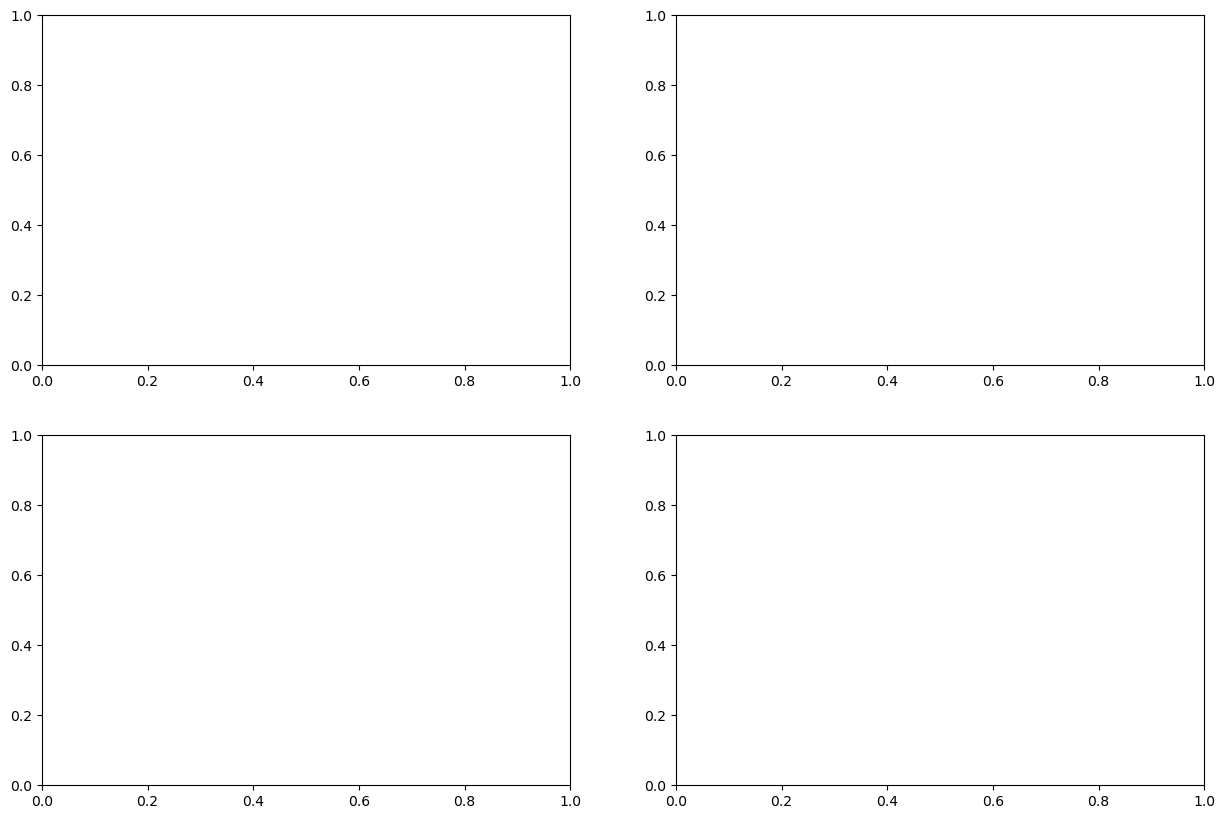

In [27]:
# Create PDP for 'Age', 'RestingBP', and 'Cholesterol'
features_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
features_to_plot_2 = ['MaxHR', 'Oldpeak']

# Stretch the plot for the first set of features
fig, ax = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the size as needed
PartialDependenceDisplay.from_estimator(model, X_train, features_to_plot, feature_names=feature_names, ax=ax)
plt.show()
